In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Data source is from Geolytics: Neighborhood Change Database (NACD) (http://demographics.geolytics.com/ncdb2010/default.aspx)

### the original dataset from the database(geolytics_nyc_census_1990_2010.csv) and the deliverables of this notebook has been uploaded on  https://github.com/picniclin/NYC_yl5240/tree/master/data

In [2]:
df = pd.read_csv('geolytics_nyc_census_1990_2010.csv')

In [3]:
df.shape

(2168, 111)

In [4]:
# list(df.columns)

In [5]:
cols = df.columns.str.replace('TRCTPOP', 'pop')\
            .str.replace('MDFAMY','median_fam_inc_')\
            .str.replace('FAVINC', 'ave_fam_inc_')\
            .str.replace('MDHHY', 'median_hh_inc_')\
            .str.replace('AVHHIN', 'ave_hh_inc_')\
            .str.replace('FALTY', 'fam_inc_')\
            .str.replace('FALT', 'fam_inc_')\
            .str.replace('MXB', 'max_')\
            .str.replace('FAY0', 'fam_inc_')\
            .str.replace('fam_inc_M', 'fam_inc_max_')\
            .str.replace('THY0', 'hh_inc_' )\
            .str.replace('hh_inc_M', 'hh_inc_max_')\
            .str.replace('MDVALHS','median_house_value_')\
            .str.replace('MDGRENT', 'median_rent_' )\
            .str.replace('1A', '1')\
            .str.replace('9A', '9')\
            .str.replace('RNTOCC', 'rent_units_')

df.columns = cols

df.rename(columns = {'AREAKEY' : 'census_tract','INTPTLAT':'lat', 'INTPTLON':'lon'}, 
          inplace = True)

In [6]:
df.head()

,census_tract,lat,lon,ZCTA5,pop9,ave_fam_inc_9,median_fam_inc_9,fam_inc_59,fam_inc_109,fam_inc_139,...,hh_inc_1251,hh_inc_1501,hh_inc_2001,hh_inc_max_201,median_hh_inc_1,median_house_value_1,median_rent_1,rent_units_9,rent_units_0,rent_units_1
0,36005000100,40.793492,-73.883532,11370.0,14303,0.00000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36005000200,40.804573,-73.856859,10473.0,2907,45267.28710,38711,31,29,29,...,203,48,68,11,59826,392500,1273,384,421,635
2,36005000400,40.808915,-73.850488,10473.0,2260,43694.20068,40484,15,19,24,...,97,161,96,73,71968,393700,1330,214,486,615
3,36005001600,40.818848,-73.858076,10473.0,5254,30042.84776,24732,61,142,53,...,20,38,20,0,30355,378100,823,1462,1517,1617
4,36005001900,40.800999,-73.909373,10454.0,1575,23377.47813,24823,76,50,0,...,19,21,0,0,25093,0,870,357,336,505


In [7]:
df.shape

(2168, 111)

In [8]:
df_median = pd.concat([df.iloc[:,:5], 
                 df.loc[:,df.columns[(df.columns.str.startswith('ava_'))|\
                                     (df.columns.str.startswith('median_'))|\
                                     (df.columns.str.startswith('rent_'))]]], 
                axis = 1)
df_median.head()

,census_tract,lat,lon,ZCTA5,pop9,median_fam_inc_9,median_hh_inc_9,median_house_value_9,median_rent_9,median_fam_inc_0,median_hh_inc_0,median_house_value_0,median_rent_0,median_fam_inc_1,median_hh_inc_1,median_house_value_1,median_rent_1,rent_units_9,rent_units_0,rent_units_1
0,36005000100,40.793492,-73.883532,11370.0,14303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36005000200,40.804573,-73.856859,10473.0,2907,38711,31632,136500,742,50817,42539,147500,730,58368,59826,392500,1273,384,421,635
2,36005000400,40.808915,-73.850488,10473.0,2260,40484,36506,163234,535,41019,39111,157610,643,73148,71968,393700,1330,214,486,615
3,36005001600,40.818848,-73.858076,10473.0,5254,24732,22739,156800,466,30104,24552,177000,558,33555,30355,378100,823,1462,1517,1617
4,36005001900,40.800999,-73.909373,10454.0,1575,24823,11215,48868,422,23671,22772,145960,461,25489,25093,0,870,357,336,505


In [9]:
df_median.to_csv('nyc_1990_2010_census_median.csv')

## NYC has 2168 census tracts in 2010 census.

## 1.1 income and rent 

## Since there is no household income in 1990, we choose family income data as income data

In [10]:
## delete the observation, i.e. census tract, with 0 median rent or 0 median families income
df2 = df.dropna()

df2 = df[~((df.median_rent_0 == 0)| (df.median_rent_9 == 0)|(df.median_rent_1 == 0)|\
         (df.median_fam_inc_9 == 0)| (df.median_fam_inc_9 == 0)|(df.median_fam_inc_1 == 0))]
df2.shape

(2089, 111)

In [11]:
# the tables of different groups of families income level
df_inc_9 = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
                (df2.columns.str.startswith('fam_inc_')&df2.columns.str.endswith('9'))]]

df_inc_0 = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
                (df2.columns.str.startswith('fam_inc_')&df2.columns.str.endswith('0'))]]

df_inc_1 = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
               (df2.columns.str.startswith('fam_inc_')&df2.columns.str.endswith('1'))]]

 
df_inc_9.shape, df_inc_0.shape, df_inc_1.shape

((2089, 20), (2089, 17), (2089, 17))

In [12]:
df_inc_rent = df2.loc[:,df2.columns[(df2.columns == 'census_tract') |\
                                (df2.columns.str.startswith('median_fam_inc')) |\
                                (df2.columns.str.startswith('median_rent'))|\
                                 (df2.columns.str.startswith('rent'))]]

In [13]:
df_inc_rent.head()

,census_tract,median_fam_inc_9,median_rent_9,median_fam_inc_0,median_rent_0,median_fam_inc_1,median_rent_1,rent_units_9,rent_units_0,rent_units_1
1,36005000200,38711,742,50817,730,58368,1273,384,421,635
2,36005000400,40484,535,41019,643,73148,1330,214,486,615
3,36005001600,24732,466,30104,558,33555,823,1462,1517,1617
4,36005001900,24823,422,23671,461,25489,870,357,336,505
5,36005002000,18762,298,19694,266,30817,455,2570,2601,2618


In [14]:
df_inc_rent.columns = ['tract', 'inc_9', 'rent_9','inc_0', 'rent_0', 'inc_1',  'rent_1',
                      'r_units_9','r_units_0','r_units_1']

df_inc_rent.head()

,tract,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1
1,36005000200,38711,742,50817,730,58368,1273,384,421,635
2,36005000400,40484,535,41019,643,73148,1330,214,486,615
3,36005001600,24732,466,30104,558,33555,823,1462,1517,1617
4,36005001900,24823,422,23671,461,25489,870,357,336,505
5,36005002000,18762,298,19694,266,30817,455,2570,2601,2618


In [15]:
df_inc_rent['ratio_rent_inc_9'] = df_inc_rent.rent_9*12/df_inc_rent.inc_9
df_inc_rent['ratio_rent_inc_0'] = df_inc_rent.rent_0*12/df_inc_rent.inc_0
df_inc_rent['ratio_rent_inc_1'] = df_inc_rent.rent_1*12/df_inc_rent.inc_1
df_inc_rent.head()

,tract,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1
1,36005000200,38711,742,50817,730,58368,1273,384,421,635,0.230012,0.172383,0.261719
2,36005000400,40484,535,41019,643,73148,1330,214,486,615,0.158581,0.188108,0.218188
3,36005001600,24732,466,30104,558,33555,823,1462,1517,1617,0.226104,0.222429,0.294323
4,36005001900,24823,422,23671,461,25489,870,357,336,505,0.204004,0.233704,0.409588
5,36005002000,18762,298,19694,266,30817,455,2570,2601,2618,0.190598,0.162080,0.177175


In [16]:
df_inc_rent.shape

(2089, 13)

## 1.2 Income level groups and entropy index

### 1） Define income level groups
Use median value of the 2089 census tracts' median family income to divide 6 income-level groups:
- < 50%
- [50%, 80%)
- [80%, 100%)
- [100%, 120%)
- [120%, 150%)
- [150%, +inf)


In [17]:
def inc_div(x):
    x1 = x * 0.5
    x2 = x * 0.8
    x3 = x
    x4 = x * 1.2
    x5 = x * 1.5
    return([int(x1), int(x2), int(x3), int(x4), int(x5)])

In [18]:
median_inc_9, median_inc_0, median_inc_1 = df_inc_rent[['inc_9', 'inc_0', 'inc_1']].median()
median_inc_9, median_inc_0, median_inc_1

(36218.0, 42590.0, 56726.0)

In [19]:
## ideal division boundary
inc_div_9 = inc_div(median_inc_9)

inc_div_0 = inc_div(median_inc_0)

inc_div_1 = inc_div(median_inc_1)

In [20]:
inc_div_9, inc_div_0, inc_div_1

([18109, 28974, 36218, 43461, 54327],
 [21295, 34072, 42590, 51108, 63885],
 [28363, 45380, 56726, 68071, 85089])

## calculate the number of families in four income-level groups for each year
the actual division boundary is regarded as the existed income-level boundary in the census data which is nearest to the boudary above

In [21]:
df_inc_9.columns

Index(['census_tract', 'fam_inc_59', 'fam_inc_109', 'fam_inc_139',
       'fam_inc_159', 'fam_inc_189', 'fam_inc_209', 'fam_inc_239',
       'fam_inc_259', 'fam_inc_289', 'fam_inc_309', 'fam_inc_359',
       'fam_inc_409', 'fam_inc_499', 'fam_inc_609', 'fam_inc_759',
       'fam_inc_1009', 'fam_inc_1259', 'fam_inc_1509', 'fam_inc_max_9'],
      dtype='object')

In [22]:
# ideal division boundary for 1990: [18109, 28974, 36218, 43461, 54327]
df_inc_9['inc_group1_9'] = df_inc_9['fam_inc_59'] + df_inc_9['fam_inc_109']\
                        + df_inc_9['fam_inc_139'] + df_inc_9['fam_inc_159'] \
                        + df_inc_9['fam_inc_189'] 
        
df_inc_9['inc_group2_9'] = df_inc_9['fam_inc_209'] + df_inc_9['fam_inc_239'] + \
                           df_inc_9['fam_inc_259'] + df_inc_9['fam_inc_289'] + \
                           df_inc_9['fam_inc_309']
        
df_inc_9['inc_group3_9'] =  df_inc_9['fam_inc_359']

df_inc_9['inc_group4_9'] = df_inc_9['fam_inc_409']

df_inc_9['inc_group5_9'] = df_inc_9['fam_inc_499']  

df_inc_9['inc_group6_9'] =  df_inc_9['fam_inc_609'] + df_inc_9['fam_inc_759'] \
                            + df_inc_9['fam_inc_1009'] + df_inc_9['fam_inc_1259']\
                            + df_inc_9['fam_inc_1509'] + df_inc_9['fam_inc_max_9']

In [23]:
df_inc_div_9 = df_inc_9[['census_tract', 'inc_group1_9', 'inc_group2_9', 
          'inc_group3_9', 'inc_group4_9',
         'inc_group5_9', 'inc_group6_9']]
df_inc_div_9.sum()[1:]

inc_group1_9    452794
inc_group2_9    314860
inc_group3_9    117385
inc_group4_9    106071
inc_group5_9    189509
inc_group6_9    559550
dtype: int64

In [24]:
df_inc_0.columns

Index(['census_tract', 'fam_inc_100', 'fam_inc_150', 'fam_inc_200',
       'fam_inc_250', 'fam_inc_300', 'fam_inc_350', 'fam_inc_400',
       'fam_inc_450', 'fam_inc_500', 'fam_inc_600', 'fam_inc_750',
       'fam_inc_1000', 'fam_inc_1250', 'fam_inc_1500', 'fam_inc_2000',
       'fam_inc_max_200'],
      dtype='object')

In [25]:
# ideal division boundary for 2010: [21295, 34072, 42590, 51108, 63885]
df_inc_0['inc_group1_0'] = df_inc_0['fam_inc_100'] + df_inc_0['fam_inc_150']\
                        + df_inc_0['fam_inc_200'] 
    
df_inc_0['inc_group2_0'] = df_inc_0['fam_inc_250'] + df_inc_0['fam_inc_300'] \
                        + df_inc_0['fam_inc_350']
    
df_inc_0['inc_group3_0'] =  df_inc_0['fam_inc_400']

df_inc_0['inc_group4_0'] =  df_inc_0['fam_inc_450'] + df_inc_0['fam_inc_500']

df_inc_0['inc_group5_0'] = df_inc_0['fam_inc_600'] 

df_inc_0['inc_group6_0'] = df_inc_0['fam_inc_750'] + df_inc_0['fam_inc_1000'] \
                            + df_inc_0['fam_inc_1250'] + df_inc_0['fam_inc_1500']\
                            + df_inc_0['fam_inc_2000']  + df_inc_0['fam_inc_max_200']

In [26]:
df_inc_div_0 = df_inc_0[['census_tract', 'inc_group1_0', 'inc_group2_0', 
          'inc_group3_0', 'inc_group4_0',
         'inc_group5_0', 'inc_group6_0']]
df_inc_div_0.sum()[1:]

inc_group1_0    466241
inc_group2_0    325881
inc_group3_0     97069
inc_group4_0    170127
inc_group5_0    146590
inc_group6_0    646516
dtype: int64

In [27]:
df_inc_1.columns

Index(['census_tract', 'fam_inc_101', 'fam_inc_151', 'fam_inc_201',
       'fam_inc_251', 'fam_inc_301', 'fam_inc_351', 'fam_inc_401',
       'fam_inc_451', 'fam_inc_501', 'fam_inc_601', 'fam_inc_751',
       'fam_inc_1001', 'fam_inc_1251', 'fam_inc_1501', 'fam_inc_2001',
       'fam_inc_max_201'],
      dtype='object')

In [28]:
# ideal division boundary for 2010: [28363, 45380, 56726, 68071, 85089]
df_inc_1['inc_group1_1'] = df_inc_1['fam_inc_101'] + df_inc_1['fam_inc_151']\
                        + df_inc_1['fam_inc_201']  + df_inc_1['fam_inc_251']\
                        + df_inc_1['fam_inc_301']
    
df_inc_1['inc_group2_1'] =  df_inc_1['fam_inc_351'] + df_inc_1['fam_inc_401']\
                        + df_inc_1['fam_inc_451']
    
df_inc_1['inc_group3_1'] =  df_inc_1['fam_inc_501'] + df_inc_1['fam_inc_601']

df_inc_1['inc_group4_1'] =  df_inc_1['fam_inc_751'] 

df_inc_1['inc_group5_1'] =  df_inc_1['fam_inc_1001']

df_inc_1['inc_group6_1'] =  df_inc_1['fam_inc_1251'] + df_inc_1['fam_inc_1501']\
                            + df_inc_1['fam_inc_2001'] + df_inc_1['fam_inc_max_201']
        

In [29]:
df_inc_div_1 = df_inc_1[['census_tract', 'inc_group1_1', 'inc_group2_1', 
          'inc_group3_1', 'inc_group4_1',
         'inc_group5_1', 'inc_group6_1']]
df_inc_div_1.sum()[1:]

inc_group1_1    511033
inc_group2_1    258739
inc_group3_1    208478
inc_group4_1    171592
inc_group5_1    216311
inc_group6_1    473612
dtype: int64

## 2) Calculation of census tracts' entropy index
entropy index of different income-level groups for each census tract from 1990 to 2010
entropy index fomular: https://github.com/picniclin/NYC_yl5240/blob/master/entropy_index_fomular.png

In [30]:
# define entropy index 
def entropy_index(x):
    Q_sum = 0
    for i in x:
        if i == 0:
            Q = 0
        else:
            Q = (-1) * (i/sum(x)) * np.log(i/sum(x))
        Q_sum += Q
    entropy_index = Q_sum/np.log(len(x))
    return entropy_index

In [31]:
df_inc_div_9.is_copy = False
df_inc_div_0.is_copy = False
df_inc_div_1.is_copy = False

In [32]:
# calculate the entropy index 
for i in df_inc_div_9.index:
    df_inc_div_9.loc[i,'entropy_index_9'] = \
            entropy_index(list(df_inc_div_9.loc[i,'inc_group1_9':'inc_group6_9']))

for i in df_inc_div_0.index:
    df_inc_div_0.loc[i,'entropy_index_0'] = \
            entropy_index(list(df_inc_div_0.loc[i,'inc_group1_0':'inc_group6_0']))
        
for i in df_inc_div_1.index:
    df_inc_div_1.loc[i,'entropy_index_1'] = \
            entropy_index(list(df_inc_div_1.loc[i,'inc_group1_1':'inc_group6_1']))

In [33]:
df_inc_div_9.head()

,census_tract,inc_group1_9,inc_group2_9,inc_group3_9,inc_group4_9,inc_group5_9,inc_group6_9,entropy_index_9
1,36005000200,133,177,32,31,84,257,0.867149
2,36005000400,89,101,50,50,89,221,0.919819
3,36005001600,353,381,165,39,161,195,0.908063
4,36005001900,175,42,0,0,67,36,0.652853
5,36005002000,1074,450,131,95,203,303,0.814774


In [34]:
df_inc_div_0.head()

,census_tract,inc_group1_0,inc_group2_0,inc_group3_0,inc_group4_0,inc_group5_0,inc_group6_0,entropy_index_0
1,36005000200,203,94,60,69,72,369,0.857971
2,36005000400,150,191,65,70,84,267,0.923299
3,36005001600,414,303,97,185,92,242,0.925875
4,36005001900,87,90,9,16,30,21,0.830158
5,36005002000,1168,523,133,83,201,217,0.779722


In [35]:
df_inc_div_1.head()

,census_tract,inc_group1_1,inc_group2_1,inc_group3_1,inc_group4_1,inc_group5_1,inc_group6_1,entropy_index_1
1,36005000200,210,240,101,49,136,319,0.921479
2,36005000400,169,157,227,79,206,386,0.943208
3,36005001600,598,301,143,167,129,69,0.862742
4,36005001900,233,61,22,16,12,30,0.672415
5,36005002000,966,427,257,63,103,218,0.804094


In [36]:
df_entropy = df_inc_div_9[['census_tract','entropy_index_9']].merge\
            (df_inc_div_0[['census_tract','entropy_index_0']],on = 'census_tract').merge\
            (df_inc_div_1[['census_tract','entropy_index_1']],on = 'census_tract')

In [37]:
df_entropy.rename(columns = {'census_tract':'tract'}, inplace = True)
df_entropy.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1
0,36005000200,0.867149,0.857971,0.921479
1,36005000400,0.919819,0.923299,0.943208
2,36005001600,0.908063,0.925875,0.862742
3,36005001900,0.652853,0.830158,0.672415
4,36005002000,0.814774,0.779722,0.804094


In [38]:
df_entropy.shape

(2089, 4)

In [39]:
## Drop abnormal observations with 0 entropy index 
#df_entropy[((df_entropy.entropy_index_9 == 0)| (df_entropy.entropy_index_0 == 0)|\
                          #(df_entropy.entropy_index_1 == 0))]

df_entropy = df_entropy[~((df_entropy.entropy_index_9 == 0)| (df_entropy.entropy_index_0 == 0)|\
                          (df_entropy.entropy_index_1 == 0))]

df_entropy.shape

(2077, 4)

## 3) Create the dataset for analysis on census tracts

In [40]:
df_census = df_entropy.merge(df_inc_rent, on = 'tract', how = 'left')

In [41]:
df_census.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1
0,36005000200,0.867149,0.857971,0.921479,38711,742,50817,730,58368,1273,384,421,635,0.230012,0.172383,0.261719
1,36005000400,0.919819,0.923299,0.943208,40484,535,41019,643,73148,1330,214,486,615,0.158581,0.188108,0.218188
2,36005001600,0.908063,0.925875,0.862742,24732,466,30104,558,33555,823,1462,1517,1617,0.226104,0.222429,0.294323
3,36005001900,0.652853,0.830158,0.672415,24823,422,23671,461,25489,870,357,336,505,0.204004,0.233704,0.409588
4,36005002000,0.814774,0.779722,0.804094,18762,298,19694,266,30817,455,2570,2601,2618,0.190598,0.162080,0.177175


In [42]:
np.percentile(df_census.loc[:,'inc_9'],75)

46843.0

In [43]:
for j in [['inc_9','rich_9'], ['inc_0','rich_0'], ['inc_1','rich_1']]:
    for i in df_census.index:
        if df_census.loc[i,j[0]] < np.percentile(df_census.loc[:,j[0]],25):
            df_census.loc[i, j[1]] = 4
        elif df_census.loc[i,j[0]] < np.percentile(df_census.loc[:,j[0]],50):
            df_census.loc[i,j[1]] = 3
        elif df_census.loc[i,j[0]] < np.percentile(df_census.loc[:,j[0]],75):
            df_census.loc[i,j[1]] = 2
        else:
            df_census.loc[i,j[1]] = 1

In [44]:
rich_ave = (df_census.rich_9 + df_census.rich_0 + df_census.rich_1)/3
for i in df_census.index:
    if rich_ave[i] < 1.5:
        df_census.loc[i,'rich_all'] = 1
    elif rich_ave[i] < 2.5:
        df_census.loc[i,'rich_all'] = 2
    elif rich_ave[i] < 3.5:
        df_census.loc[i,'rich_all'] = 3
    else:
        df_census.loc[i,'rich_all'] = 4

In [45]:
df_census.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1,rich_9,rich_0,rich_1,rich_all
0,36005000200,0.867149,0.857971,0.921479,38711,742,50817,730,58368,1273,384,421,635,0.230012,0.172383,0.261719,2.0,2.0,2.0,2.0
1,36005000400,0.919819,0.923299,0.943208,40484,535,41019,643,73148,1330,214,486,615,0.158581,0.188108,0.218188,2.0,3.0,2.0,2.0
2,36005001600,0.908063,0.925875,0.862742,24732,466,30104,558,33555,823,1462,1517,1617,0.226104,0.222429,0.294323,4.0,4.0,4.0,4.0
3,36005001900,0.652853,0.830158,0.672415,24823,422,23671,461,25489,870,357,336,505,0.204004,0.233704,0.409588,4.0,4.0,4.0,4.0
4,36005002000,0.814774,0.779722,0.804094,18762,298,19694,266,30817,455,2570,2601,2618,0.190598,0.162080,0.177175,4.0,4.0,4.0,4.0


In [46]:
df_census.describe()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,r_units_9,r_units_0,r_units_1,ratio_rent_inc_9,ratio_rent_inc_0,ratio_rent_inc_1,rich_9,rich_0,rich_1,rich_all
count,2.077000e+03,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,3.605455e+10,0.813956,0.807262,0.838069,37733.340876,543.203659,48685.029851,751.435243,65962.064516,1148.824747,962.096774,1008.557535,1028.034184,0.198790,0.214137,0.249021,2.499278,2.498796,2.499278,2.498315
std,2.595959e+07,0.123108,0.131038,0.136805,18724.271851,148.592375,28336.768464,226.933084,39445.601512,327.845257,899.818493,870.506315,840.615093,0.075942,0.071700,0.100420,1.118518,1.118087,1.118518,1.098967
min,3.600500e+10,0.194083,0.183020,0.173982,4999.000000,171.000000,9893.000000,195.000000,8542.000000,231.000000,4.000000,9.000000,32.000000,0.067760,0.047473,0.042308,1.000000,1.000000,1.000000,1.000000
25%,3.604702e+10,0.755000,0.756307,0.786185,25089.000000,453.000000,30720.000000,644.000000,40031.000000,964.000000,357.000000,412.000000,431.000000,0.150818,0.164954,0.181927,1.000000,1.000000,1.000000,2.000000
50%,3.604712e+10,0.848471,0.846033,0.879284,36221.000000,531.000000,42483.000000,740.000000,56667.000000,1120.000000,718.000000,788.000000,822.000000,0.183669,0.204236,0.235487,2.000000,2.000000,2.000000,2.000000
75%,3.608103e+10,0.904543,0.896749,0.935426,46843.000000,628.000000,58833.000000,833.000000,80016.000000,1305.000000,1269.000000,1321.000000,1350.000000,0.226971,0.253867,0.300615,3.000000,3.000000,3.000000,3.000000
max,3.608503e+10,0.982500,0.980721,0.998777,150001.000000,1001.000000,200001.000000,2001.000000,250001.000000,2001.000000,8997.000000,8900.000000,8281.000000,0.885777,0.583245,1.298057,4.000000,4.000000,4.000000,4.000000


In [47]:
df_census.shape

(2077, 20)

In [48]:
#df_census.to_csv('civic_census.csv')

# 2. Descriptive of change

In [49]:
df_change = pd.DataFrame()

In [50]:
df_change['entropy_9_1'] = df_census.entropy_index_1 / df_census.entropy_index_9 -1
df_change['rent_9_1'] = df_census.rent_1 / df_census.rent_9 -1
df_change['inc_9_1'] = df_census.inc_1 / df_census.inc_9 -1
df_change['rent_units_9_1'] = df_census.r_units_1 / df_census.r_units_9 -1
df_change['rent_burden_9_1'] = df_census.ratio_rent_inc_1 / df_census.ratio_rent_inc_9 -1

In [51]:
df_change.median()

entropy_9_1        0.036438
rent_9_1           1.100318
inc_9_1            0.665949
rent_units_9_1     0.104418
rent_burden_9_1    0.245663
dtype: float64

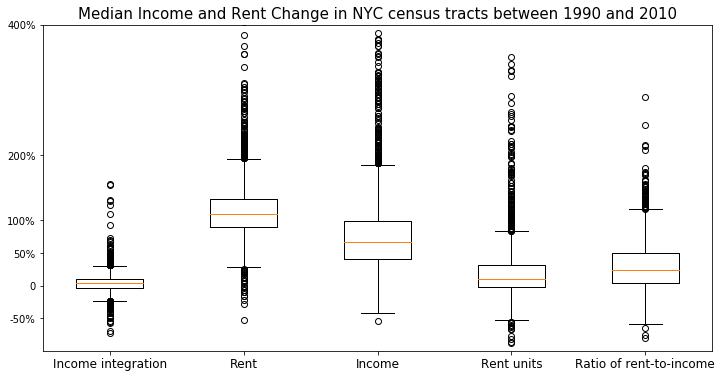

In [52]:
num = range(df_change.shape[1])

plt.figure(figsize = (12, 6))
plt.boxplot([df_change.iloc[:,i] for i in num])
plt.ylim(-1,4)
plt.xticks([i+1 for i in num], 
           ('Income integration', 'Rent', 'Income', 'Rent units', 'Ratio of rent-to-income'),
          fontsize = 12)
plt.title('Median Income and Rent Change in NYC census tracts between 1990 and 2010', 
          fontsize = 15)
plt.yticks((-0.5,0,0.5,1,2,4), ('-50%', '0', '50%', '100%', '200%', '400%'))
#plt.grid()
plt.show()

In [53]:
df_change1 = pd.DataFrame()
df_change1['entropy_9_0'] = df_census.entropy_index_0 / df_census.entropy_index_9 -1
df_change1['rent_9_0'] = df_census.rent_0 / df_census.rent_9 -1
df_change1['inc_9_0'] = df_census.inc_0 / df_census.inc_9 -1
df_change1['rent_units_9_0'] = df_census.r_units_0 / df_census.r_units_9 -1
df_change1['rent_burden_9_0'] = df_census.ratio_rent_inc_0 / df_census.ratio_rent_inc_9 -1

In [54]:
df_change2 = pd.DataFrame()
df_change2['entropy_0_1'] = df_census.entropy_index_1 / df_census.entropy_index_0 -1
df_change2['rent_0_1'] = df_census.rent_1 / df_census.rent_0 -1
df_change2['inc_0_1'] = df_census.inc_1 / df_census.inc_0 -1
df_change2['rent_units_0_1'] = df_census.r_units_1 / df_census.r_units_0 -1
df_change2['rent_burden_0_1'] = df_census.ratio_rent_inc_1 / df_census.ratio_rent_inc_0 -1

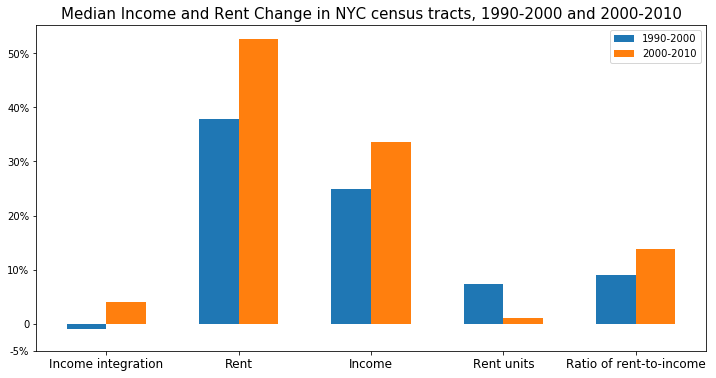

In [55]:
plt.figure(figsize = (12, 6))
plt.bar([i-0.15 for i in num], [df_change1.iloc[:,i].median() for i in num], 
        width = 0.3, label = '1990-2000')
plt.bar([i+0.15 for i in num], [df_change2.iloc[:,i].median() for i in num], 
        width = 0.3, label = '2000-2010')
plt.xticks([i for i in num], 
           ('Income integration', 'Rent', 'Income', 'Rent units', 'Ratio of rent-to-income'),
          fontsize = 12)
plt.yticks((-0.05,0, 0.1,0.2,0.3, 0.4,0.5), ('-5%', '0', '10%', '20%', '30%','40%','50%'))
plt.title('Median Income and Rent Change in NYC census tracts, 1990-2000 and 2000-2010', 
          fontsize = 15)
plt.legend()
plt.show()

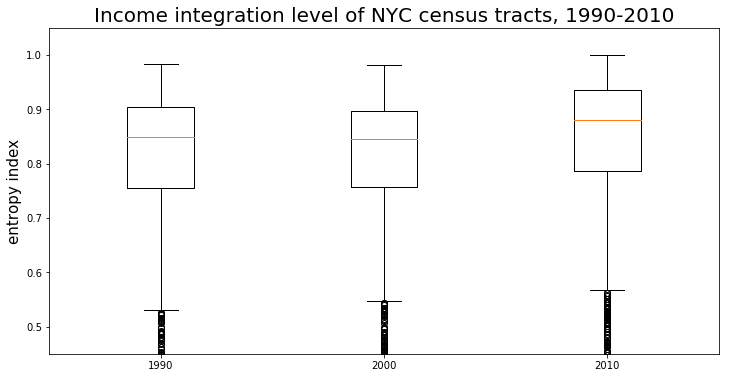

In [56]:

plt.figure(figsize = (12, 6))
plt.boxplot([df_census.entropy_index_9, df_census.entropy_index_0, df_census.entropy_index_1])
plt.ylim(0.45,1.05)
plt.xticks([1,2,3], ('1990','2000','2010'))
plt.ylabel('entropy index', fontsize = 15)       
plt.title('Income integration level of NYC census tracts, 1990-2010', fontsize = 20)

plt.show()

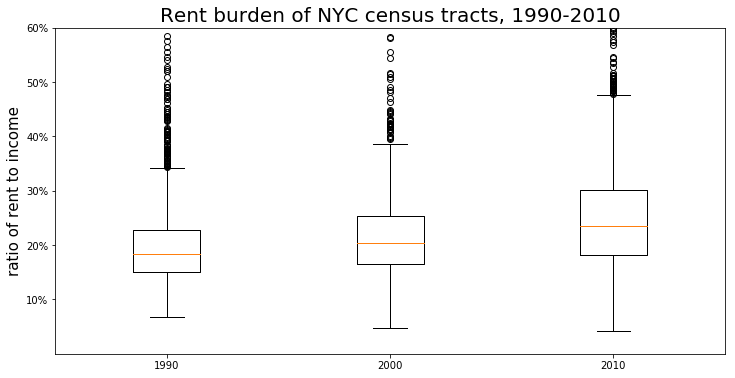

In [57]:
plt.figure(figsize = (12, 6))
plt.boxplot([df_census.ratio_rent_inc_9 , df_census.ratio_rent_inc_0, df_census.ratio_rent_inc_1])

plt.xticks([1,2,3], ('1990','2000','2010'))
      
plt.title('Rent burden of NYC census tracts, 1990-2010', fontsize = 20)
plt.ylim(0,0.6)
plt.yticks((0.1,0.2, 0.3, 0.4, 0.5, 0.6), ('10%', '20%', '30%', '40%', '50%', '60%'))
plt.ylabel('ratio of rent to income', fontsize = 15)
#plt.grid()
plt.show()

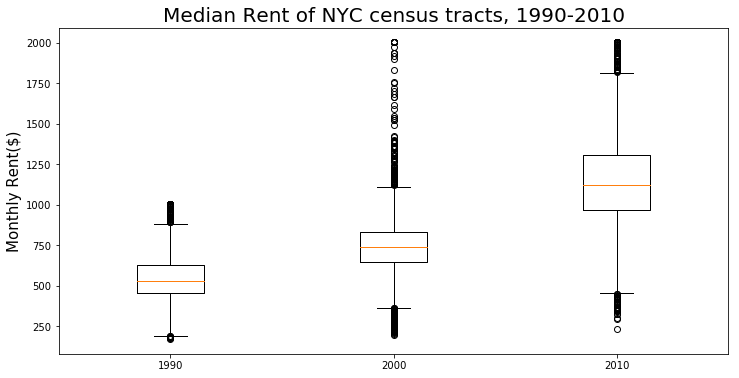

In [58]:
plt.figure(figsize = (12, 6))
plt.boxplot([df_census.rent_9, df_census.rent_0, df_census.rent_1])
#plt.ylim(-1,5)
plt.xticks([1,2,3], ('1990','2000','2010'))
      
plt.title('Median Rent of NYC census tracts, 1990-2010', fontsize = 20)
#plt.ylim(0,0.6)
#plt.yticks((0.1,0.2, 0.3, 0.4, 0.5, 0.6), ('10%', '20%', '30%', '40%', '50%', '60%'))
plt.ylabel('Monthly Rent($)', fontsize = 15)
#plt.grid()
plt.show()

# 3. Combine the data

In [59]:
df1 = pd.concat([df_census.iloc[:,:-4], df_change1, df_change2, df_census.iloc[:,-4:]], axis = 1)
df1.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1,rich_9,rich_0,rich_1,rich_all
0,36005000200,0.867149,0.857971,0.921479,38711,742,50817,730,58368,1273,...,-0.250547,0.074021,0.743836,0.148592,0.508314,0.518238,2.0,2.0,2.0,2.0
1,36005000400,0.919819,0.923299,0.943208,40484,535,41019,643,73148,1330,...,0.186193,0.021563,1.068429,0.783271,0.265432,0.159907,2.0,3.0,2.0,2.0
2,36005001600,0.908063,0.925875,0.862742,24732,466,30104,558,33555,823,...,-0.016253,-0.068188,0.474910,0.114636,0.065920,0.323222,4.0,4.0,4.0,4.0
3,36005001900,0.652853,0.830158,0.672415,24823,422,23671,461,25489,870,...,0.145582,-0.190016,0.887202,0.076803,0.502976,0.752597,4.0,4.0,4.0,4.0
4,36005002000,0.814774,0.779722,0.804094,18762,298,19694,266,30817,455,...,-0.149625,0.031258,0.710526,0.564791,0.006536,0.093134,4.0,4.0,4.0,4.0


In [60]:
df1.shape

(2077, 30)

In [61]:
df1.to_csv('civic_census.csv')

# 4. Normalize and drop outliers

## 4.1 Normalized

In [62]:
def normalize(x):
    norm = (x - x.min())/(x.max() - x.min())
    return norm

In [63]:
df_normed0 = pd.DataFrame()
df_normed0['tract'] = df1['tract']

for i in range(1, df1.shape[1]-4):
    df_normed0[df1.columns[i]] = normalize(df1.iloc[:,i])

df_normed0 = pd.concat([df_normed0, df1.iloc[:,-4:]], axis = 1)

df_normed0.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1,rich_9,rich_0,rich_1,rich_all
0,36005000200,0.853692,0.846120,0.906283,0.232493,0.687952,0.215267,0.296235,0.206354,0.588701,...,0.265741,0.364669,0.331641,0.233916,0.013994,0.321608,2.0,2.0,2.0,2.0
1,36005000400,0.920498,0.928015,0.932628,0.244721,0.438554,0.163728,0.248062,0.267565,0.620904,...,0.484406,0.340919,0.407598,0.392235,0.011502,0.229470,2.0,3.0,2.0,2.0
2,36005001600,0.905587,0.931245,0.835068,0.136088,0.355422,0.106313,0.200997,0.103591,0.334463,...,0.383046,0.300285,0.268711,0.225446,0.009456,0.271464,4.0,4.0,4.0,4.0
3,36005001900,0.581888,0.811254,0.604311,0.136715,0.302410,0.072475,0.147287,0.070186,0.361017,...,0.464073,0.245128,0.365190,0.216009,0.013939,0.381870,4.0,4.0,4.0,4.0
4,36005002000,0.787263,0.748026,0.763963,0.094916,0.153012,0.051555,0.039313,0.092252,0.126554,...,0.316270,0.345308,0.323847,0.337736,0.008846,0.212301,4.0,4.0,4.0,4.0


In [64]:
df_normed0.shape

(2077, 30)

In [65]:
df_normed0.to_csv('civic_census_normed.csv')

## 4.2 drop outliers

In [66]:
def outlier(x):
    outlier = np.mean(x) + 3 * np.std(x)
    return outlier

In [72]:
a = np.ones(df1.shape[0])
for i in range(df1.shape[1]):
    a0 = df1.iloc[:,i] < outlier(df1.iloc[:,i])
    a = a0 * a
        
df_no_outlier = df1[[bool(i) for i in a]]
df_no_outlier.shape

(1770, 30)

In [73]:
df_no_outlier.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1,rich_9,rich_0,rich_1,rich_all
0,36005000200,0.867149,0.857971,0.921479,38711,742,50817,730,58368,1273,...,-0.250547,0.074021,0.743836,0.148592,0.508314,0.518238,2.0,2.0,2.0,2.0
1,36005000400,0.919819,0.923299,0.943208,40484,535,41019,643,73148,1330,...,0.186193,0.021563,1.068429,0.783271,0.265432,0.159907,2.0,3.0,2.0,2.0
2,36005001600,0.908063,0.925875,0.862742,24732,466,30104,558,33555,823,...,-0.016253,-0.068188,0.474910,0.114636,0.065920,0.323222,4.0,4.0,4.0,4.0
3,36005001900,0.652853,0.830158,0.672415,24823,422,23671,461,25489,870,...,0.145582,-0.190016,0.887202,0.076803,0.502976,0.752597,4.0,4.0,4.0,4.0
4,36005002000,0.814774,0.779722,0.804094,18762,298,19694,266,30817,455,...,-0.149625,0.031258,0.710526,0.564791,0.006536,0.093134,4.0,4.0,4.0,4.0


In [74]:
df_no_outlier.to_csv('civic_census_dropoutliers.csv')

## 4.3 Normalized and no outliers

In [81]:
df_normed = pd.DataFrame()
df_normed['tract'] = df2['tract']

for i in range(1, df2.shape[1]-4):
    df_normed[df2.columns[i]] = normalize(df2.iloc[:,i])

df_normed = pd.concat([df_normed, df2.iloc[:,-4:]], axis = 1)

df_normed.head()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1,rich_9,rich_0,rich_1,rich_all
0,36005000200,0.793073,0.781640,0.905241,0.377683,0.711970,0.324224,0.437449,0.277105,0.572770,...,0.170053,0.633739,0.710826,0.326530,0.192816,0.649818,2.0,2.0,2.0,2.0
1,36005000400,0.887558,0.897852,0.931879,0.399758,0.453865,0.243885,0.366312,0.362769,0.606221,...,0.489531,0.588810,0.873628,0.656091,0.158484,0.463651,2.0,3.0,2.0,2.0
2,36005001600,0.866469,0.902434,0.833235,0.203633,0.367830,0.154388,0.296811,0.133290,0.308685,...,0.341440,0.511940,0.575944,0.308898,0.130283,0.548499,4.0,4.0,4.0,4.0
3,36005001900,0.408653,0.732163,0.599914,0.204766,0.312968,0.101641,0.217498,0.086539,0.336268,...,0.459824,0.407595,0.782732,0.289253,0.192062,0.771578,4.0,4.0,4.0,4.0
4,36005002000,0.699120,0.642441,0.761340,0.129302,0.158354,0.069031,0.058054,0.117420,0.092723,...,0.243878,0.597114,0.694119,0.542644,0.121889,0.428959,4.0,4.0,4.0,4.0


In [82]:
df_normed.describe()

,tract,entropy_index_9,entropy_index_0,entropy_index_1,inc_9,rent_9,inc_0,rent_0,inc_1,rent_1,...,rent_burden_9_0,entropy_0_1,rent_0_1,inc_0_1,rent_units_0_1,rent_burden_0_1,rich_9,rich_0,rich_1,rich_all
count,1.770000e+03,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,...,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,3.605516e+10,0.744915,0.736447,0.835659,0.345435,0.456501,0.275526,0.434808,0.288839,0.479359,...,0.442381,0.607738,0.608756,0.438129,0.129586,0.472123,2.517514,2.535593,2.544633,2.532203
std,2.625915e+07,0.165320,0.169541,0.129219,0.167771,0.164215,0.151900,0.137582,0.156125,0.166306,...,0.168241,0.098964,0.107977,0.153185,0.046213,0.143574,1.061148,1.067072,1.069378,1.047937
min,3.600500e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.604702e+10,0.645104,0.650487,0.777626,0.221478,0.362843,0.164697,0.375307,0.176171,0.393192,...,0.323281,0.553448,0.546473,0.331548,0.112340,0.373528,2.000000,2.000000,2.000000,2.000000
50%,3.604710e+10,0.789866,0.781141,0.872607,0.344209,0.448878,0.252663,0.443990,0.262461,0.477993,...,0.426450,0.604000,0.600609,0.422468,0.122917,0.456391,3.000000,3.000000,3.000000,3.000000
75%,3.608104e+10,0.869258,0.861088,0.928523,0.461013,0.559850,0.366722,0.507768,0.375694,0.568075,...,0.549075,0.657985,0.661503,0.520698,0.137560,0.554012,3.000000,3.000000,3.000000,3.000000
max,3.608503e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000


In [83]:
df_normed.shape

(1770, 30)

In [84]:
df_normed.to_csv('civic_census_normed_dropoutliers.csv')